## Trending YouTube Video Statistics
#### Daily statistics for trending YouTube videos
-----------

### Step 1. Data Load & EDA

In [1]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv('./data/KRvideos.csv', engine='python')
# if error occurs like -> "utf-8" codec can"t decode bytes in position 00000-00000: unexpected end of data
# add parameter -> engine="python"

In [10]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [12]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,34567.000000,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04
mean,21.137675,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03
std,6.675455,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02
75%,25.000000,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


In [13]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...
34566,C-bLqIftDY4,18.14.06,[법륜스님의 즉문즉설 제 1398회] 시동생의 아이를 키우게 됐어요,법륜스님의 즉문즉설,29,2018-06-10T20:00:01.000Z,"불교|""즉문즉설""|""법륜스님""|""정토회""|""buddha""|""buddhism""|""po...",63716,500,58,135,https://i.ytimg.com/vi/C-bLqIftDY4/default.jpg,False,False,False,"3월에 시동생이 이혼했습니다 그러면서 제가중2, 7살, 4살 되는 조카들을 데리고 ..."


In [17]:
df.sort_values(by='likes', ascending=False)[:10]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
30844,7C2z4GqqS5E,18.24.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150839,172570,1142274,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30583,7C2z4GqqS5E,18.23.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",80738011,5053338,165854,1114800,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30352,7C2z4GqqS5E,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30486,7C2z4GqqS5E,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30291,7C2z4GqqS5E,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30171,7C2z4GqqS5E,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
30069,7C2z4GqqS5E,18.20.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
29969,7C2z4GqqS5E,18.20.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
4856,FlsCjmMhFmw,17.11.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811223,1470388,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
4678,FlsCjmMhFmw,17.10.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656686,1353663,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."


In [18]:
df.isna().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

In [19]:
df['description']

0        윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1        [채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2                                          퍼가실때 꼭 출처 부탁드려요
3                                      다스는 누구겁니까 듣고 난 후 표정
4        김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
                               ...                        
34562    - 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563    안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ...
34564    2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565    워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...
34566    3월에 시동생이 이혼했습니다 그러면서 제가중2, 7살, 4살 되는 조카들을 데리고 ...
Name: description, Length: 34567, dtype: object

<AxesSubplot:>

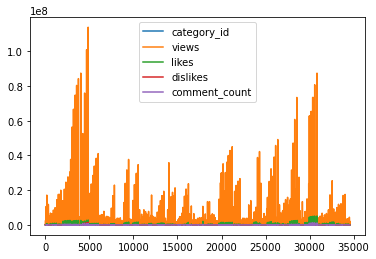

In [20]:
df.plot();

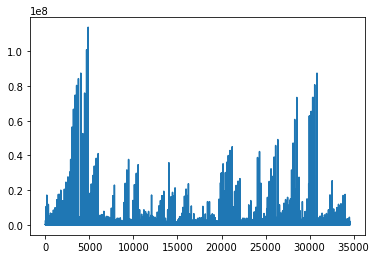

In [22]:
df['views'].plot();

In [23]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.082367,-0.097976,-0.016725,-0.065038,0.026884,0.054086,-0.042891
views,-0.082367,1.000000,0.860043,0.581443,0.807600,-0.003379,-0.019284,-0.002112
likes,-0.097976,0.860043,1.000000,0.428036,0.922731,-0.010734,-0.021390,-0.000232
dislikes,-0.016725,0.581443,0.428036,1.000000,0.555549,-0.002056,-0.008080,-0.000589
comment_count,-0.065038,0.807600,0.922731,0.555549,1.000000,-0.011536,-0.014295,-0.000879
comments_disabled,0.026884,-0.003379,-0.010734,-0.002056,-0.011536,1.000000,0.220468,-0.004221
ratings_disabled,0.054086,-0.019284,-0.021390,-0.008080,-0.014295,0.220468,1.000000,-0.007080
video_error_or_removed,-0.042891,-0.002112,-0.000232,-0.000589,-0.000879,-0.004221,-0.007080,1.000000


In [30]:
import matplotlib.pyplot as plt
plt.style.use('dark_background');

In [38]:
df['views']

0        156130
1         76533
2        421409
3        222850
4         84466
          ...  
34562    156439
34563    130948
34564     62555
34565     63306
34566     63716
Name: views, Length: 34567, dtype: int64

In [39]:
df['views'].values

array([156130,  76533, 421409, ...,  62555,  63306,  63716])

In [44]:
df['views'].sort_values(ascending=False)

4856     113876217
4678     100911567
4018      87450245
30844     87430865
3750      84281319
           ...    
4806          3268
18568         3124
17414         2919
509           2623
1071          2050
Name: views, Length: 34567, dtype: int64

In [45]:
top500_views = df['views'].sort_values(ascending=False)[:500]

In [48]:
top500_views

4856     113876217
4678     100911567
4018      87450245
30844     87430865
3750      84281319
           ...    
13244      3316015
13317      3316015
19121      3312590
8973       3307126
1569       3304059
Name: views, Length: 500, dtype: int64

In [52]:
top500_views.reset_index()

,index,views
0,4856,113876217
1,4678,100911567
2,4018,87450245
3,30844,87430865
4,3750,84281319
...,...,...
495,13244,3316015
496,13317,3316015
497,19121,3312590
498,8973,3307126


In [55]:
top500_views = top500_views.reset_index().copy()

In [63]:
top500_views.drop(['index'], axis=1, inplace=True)

In [64]:
top500_views

,views
0,113876217
1,100911567
2,87450245
3,87430865
4,84281319
...,...
495,3316015
496,3316015
497,3312590
498,3307126


In [68]:
top500_views.index

RangeIndex(start=0, stop=500, step=1)

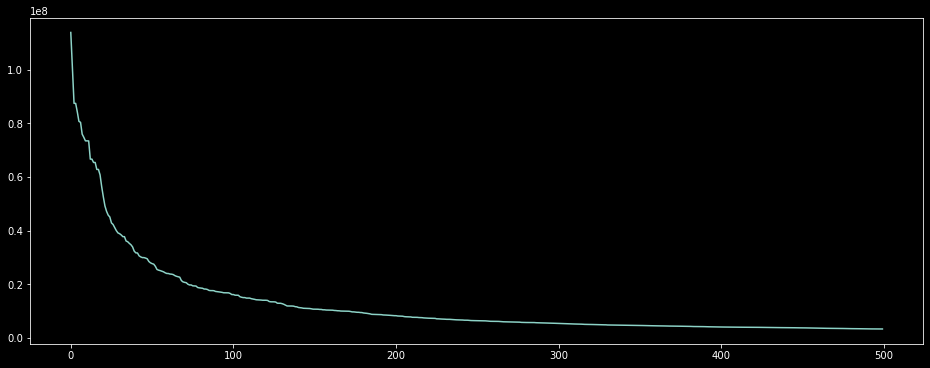

In [71]:
plt.figure(figsize=(16,6))
plt.plot(top500_views.index, top500_views.values);

In [72]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [74]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34567 entries, 0 to 34566
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   trending_date           34567 non-null  object
 2   title                   34567 non-null  object
 3   channel_title           34567 non-null  object
 4   category_id             34567 non-null  int64 
 5   publish_time            34567 non-null  object
 6   tags                    34567 non-null  object
 7   views                   34567 non-null  int64 
 8   likes                   34567 non-null  int64 
 9   dislikes                34567 non-null  int64 
 10  comment_count           34567 non-null  int64 
 11  thumbnail_link          34567 non-null  object
 12  comments_disabled       34567 non-null  bool  
 13  ratings_disabled        34567 non-null  bool  
 14  video_error_or_removed  34567 non-null  bool  
 15  de

In [76]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,34567.000000,3.456700e+04,3.456700e+04,3.456700e+04,3.456700e+04
mean,21.137675,4.249473e+05,1.218642e+04,5.390980e+02,2.025383e+03
std,6.675455,2.430637e+06,1.170531e+05,1.370852e+04,2.150677e+04
min,1.000000,2.050000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,22.000000,4.776850e+04,4.120000e+02,2.100000e+01,1.050000e+02
50%,24.000000,1.114960e+05,1.389000e+03,6.500000e+01,3.450000e+02
75%,25.000000,2.788665e+05,3.704500e+03,1.750000e+02,9.290000e+02
max,44.000000,1.138762e+08,5.150839e+06,1.470388e+06,1.142274e+06


#### Heatmap

<AxesSubplot:>

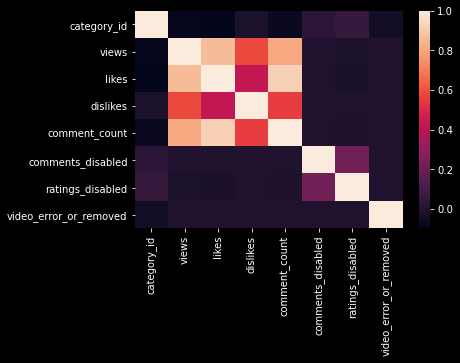

In [82]:
import seaborn as sns
sns.heatmap(df.corr())

<AxesSubplot:>

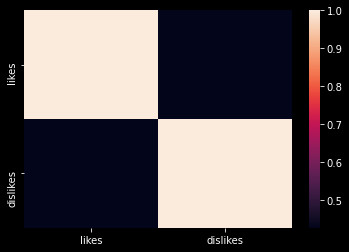

In [83]:
sns.heatmap(df[['likes','dislikes']].corr())

<AxesSubplot:>

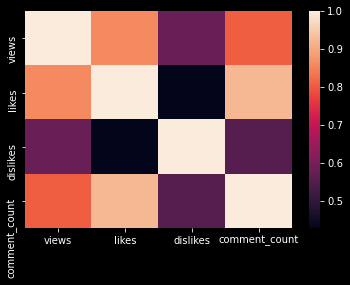

In [84]:
sns.heatmap(df[['views','likes','dislikes','comment_count']].corr())

<AxesSubplot:>

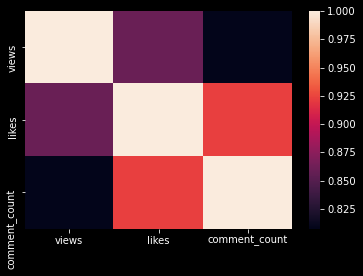

In [85]:
sns.heatmap(df[['views','likes','comment_count']].corr())

<AxesSubplot:>

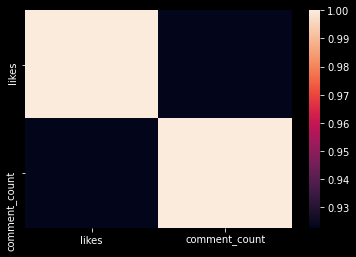

In [86]:
sns.heatmap(df[['likes','comment_count']].corr())

<AxesSubplot:>

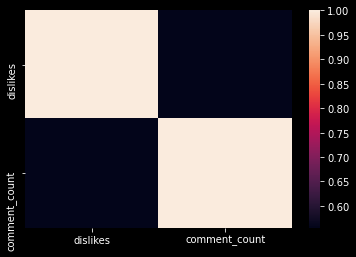

In [87]:
sns.heatmap(df[['dislikes','comment_count']].corr())

#### Check the Ratio of "Boolean" values

In [93]:
(df.comments_disabled == True).sum() / len(df.comments_disabled)

0.01478288541094107

In [95]:
(df.ratings_disabled == True).sum() / len(df.ratings_disabled)

0.0405010559203865

In [96]:
(df.video_error_or_removed == True).sum() / len(df.video_error_or_removed)

0.001186102351954176

#### Time Series

In [102]:
df.trending_date

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
34562    18.14.06
34563    18.14.06
34564    18.14.06
34565    18.14.06
34566    18.14.06
Name: trending_date, Length: 34567, dtype: object

In [101]:
(df.trending_date.str.contains('.') == False).sum()

0

In [114]:
df.trending_date.unique()

array(['17.14.11', '17.15.11', '17.16.11', '17.17.11', '17.18.11',
       '17.19.11', '17.20.11', '17.21.11', '17.22.11', '17.23.11',
       '17.24.11', '17.25.11', '17.26.11', '17.27.11', '17.28.11',
       '17.29.11', '17.30.11', '17.01.12', '17.02.12', '17.03.12',
       '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12',
       '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12',
       '17.14.12', '17.15.12', '17.16.12', '17.17.12', '17.18.12',
       '17.19.12', '17.20.12', '17.21.12', '17.22.12', '17.23.12',
       '17.24.12', '17.25.12', '17.26.12', '17.27.12', '17.28.12',
       '17.29.12', '17.30.12', '17.31.12', '18.01.01', '18.02.01',
       '18.03.01', '18.04.01', '18.05.01', '18.06.01', '18.07.01',
       '18.08.01', '18.09.01', '18.12.01', '18.13.01', '18.14.01',
       '18.15.01', '18.16.01', '18.17.01', '18.18.01', '18.19.01',
       '18.20.01', '18.21.01', '18.22.01', '18.23.01', '18.24.01',
       '18.25.01', '18.26.01', '18.27.01', '18.28.01', '18.29.

In [106]:
df.trending_date[-10:]

34557    18.14.06
34558    18.14.06
34559    18.14.06
34560    18.14.06
34561    18.14.06
34562    18.14.06
34563    18.14.06
34564    18.14.06
34565    18.14.06
34566    18.14.06
Name: trending_date, dtype: object

In [103]:
import datetime

In [120]:
'20' + df.trending_date

0        2017.14.11
1        2017.14.11
2        2017.14.11
3        2017.14.11
4        2017.14.11
            ...    
34562    2018.14.06
34563    2018.14.06
34564    2018.14.06
34565    2018.14.06
34566    2018.14.06
Name: trending_date, Length: 34567, dtype: object

In [121]:
df.trending_date = '20' + df.trending_date

In [124]:
datetime.datetime.strptime(df.trending_date[0], '%Y.%d.%m')

datetime.datetime(2017, 11, 14, 0, 0)

In [127]:
datetime.datetime.strptime(df.trending_date[0], '%Y.%d.%m').date()

datetime.date(2017, 11, 14)

In [131]:
[datetime.datetime.strptime(x, '%Y.%d.%m').date() for x in df.trending_date][:10]

[datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14),
 datetime.date(2017, 11, 14)]

In [132]:
df.trending_date = [datetime.datetime.strptime(x, '%Y.%d.%m').date() for x in df.trending_date]

In [135]:
df.set_index('trending_date', inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34567 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   title                   34567 non-null  object
 2   channel_title           34567 non-null  object
 3   category_id             34567 non-null  int64 
 4   publish_time            34567 non-null  object
 5   tags                    34567 non-null  object
 6   views                   34567 non-null  int64 
 7   likes                   34567 non-null  int64 
 8   dislikes                34567 non-null  int64 
 9   comment_count           34567 non-null  int64 
 10  thumbnail_link          34567 non-null  object
 11  comments_disabled       34567 non-null  bool  
 12  ratings_disabled        34567 non-null  bool  
 13  video_error_or_removed  34567 non-null  bool  
 14  description             31404 non-null  objec

In [143]:
df.index

Index([2017-11-14, 2017-11-14, 2017-11-14, 2017-11-14, 2017-11-14, 2017-11-14,
       2017-11-14, 2017-11-14, 2017-11-14, 2017-11-14,
       ...
       2018-06-14, 2018-06-14, 2018-06-14, 2018-06-14, 2018-06-14, 2018-06-14,
       2018-06-14, 2018-06-14, 2018-06-14, 2018-06-14],
      dtype='object', name='trending_date', length=34567)

In [147]:
pd.to_datetime(df.index)

DatetimeIndex(['2017-11-14', '2017-11-14', '2017-11-14', '2017-11-14',
               '2017-11-14', '2017-11-14', '2017-11-14', '2017-11-14',
               '2017-11-14', '2017-11-14',
               ...
               '2018-06-14', '2018-06-14', '2018-06-14', '2018-06-14',
               '2018-06-14', '2018-06-14', '2018-06-14', '2018-06-14',
               '2018-06-14', '2018-06-14'],
              dtype='datetime64[ns]', name='trending_date', length=34567, freq=None)

In [146]:
df.index = pd.to_datetime(df.index)

In [148]:
df.index

DatetimeIndex(['2017-11-14', '2017-11-14', '2017-11-14', '2017-11-14',
               '2017-11-14', '2017-11-14', '2017-11-14', '2017-11-14',
               '2017-11-14', '2017-11-14',
               ...
               '2018-06-14', '2018-06-14', '2018-06-14', '2018-06-14',
               '2018-06-14', '2018-06-14', '2018-06-14', '2018-06-14',
               '2018-06-14', '2018-06-14'],
              dtype='datetime64[ns]', name='trending_date', length=34567, freq=None)

In [156]:
df.index.year

Int64Index([2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='trending_date', length=34567)

In [157]:
df.index.month

Int64Index([11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
            ...
             6,  6,  6,  6,  6,  6,  6,  6,  6,  6],
           dtype='int64', name='trending_date', length=34567)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34567 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   title                   34567 non-null  object
 2   channel_title           34567 non-null  object
 3   category_id             34567 non-null  int64 
 4   publish_time            34567 non-null  object
 5   tags                    34567 non-null  object
 6   views                   34567 non-null  int64 
 7   likes                   34567 non-null  int64 
 8   dislikes                34567 non-null  int64 
 9   comment_count           34567 non-null  int64 
 10  thumbnail_link          34567 non-null  object
 11  comments_disabled       34567 non-null  bool  
 12  ratings_disabled        34567 non-null  bool  
 13  video_error_or_removed  34567 non-null  bool  
 14  description             31404 non-nul

### null value

In [177]:
df[df.description.isnull()==True].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3163 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                3163 non-null   object
 1   title                   3163 non-null   object
 2   channel_title           3163 non-null   object
 3   category_id             3163 non-null   int64 
 4   publish_time            3163 non-null   object
 5   tags                    3163 non-null   object
 6   views                   3163 non-null   int64 
 7   likes                   3163 non-null   int64 
 8   dislikes                3163 non-null   int64 
 9   comment_count           3163 non-null   int64 
 10  thumbnail_link          3163 non-null   object
 11  comments_disabled       3163 non-null   bool  
 12  ratings_disabled        3163 non-null   bool  
 13  video_error_or_removed  3163 non-null   bool  
 14  description             0 non-null    

In [178]:
df[df.description.isnull()==True]

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-11-14,Ssx4JpUsW_U,"[ 전체 ] 김어준의 뉴스공장 1113(월) 박범계, 최강욱, 김준형, 정청래, 임상훈",시대정신,25,2017-11-13T00:02:11.000Z,"박범계|""최강욱""|""김준형""|""정청래""|""임상훈""|""김어준의 뉴스공장""",88115,765,63,104,https://i.ytimg.com/vi/Ssx4JpUsW_U/default.jpg,False,False,False,NaN
2017-11-14,K45GLGZXY4k,"'박정희에게 길을 묻다' 세미나에 다녀와서 (정규재 칼럼, 11월 13일)",정규재TV,25,2017-11-13T09:04:03.000Z,"정규재티비|""정규재TV""|""jkj""|""정규재뉴스""|""시사""|""경제""|""국제""|""정규...",58676,2183,390,854,https://i.ytimg.com/vi/K45GLGZXY4k/default.jpg,False,False,False,NaN
2017-11-14,d5bsz2nJvrM,顽强的小生命! 婴儿靠自己力气从妈妈肚子里挣脱出世,龙的传人,22,2017-11-12T01:31:39.000Z,[none],8266,0,0,0,https://i.ytimg.com/vi/d5bsz2nJvrM/default.jpg,False,False,False,NaN
2017-11-14,O5V8CUj-fmg,[1일 2강다니엘] 아름다운 녤 🦋,홀리데이녤 Ju,22,2017-11-13T11:37:45.000Z,[none],13662,610,3,55,https://i.ytimg.com/vi/O5V8CUj-fmg/default.jpg,False,False,False,NaN
2017-11-14,P9KQOvLRVNQ,"박지원의 이명박 기자회견 극딜!! 안초딩, 바른정당 자꾸 기웃거리면 나 민주당 간다...",뉴스 당장,25,2017-11-13T01:22:04.000Z,"박지원|""이명박""|""기자회견""|""안초딩""|""바른정당""|""민주당""|""꿀렁꿀렁""",59759,371,45,125,https://i.ytimg.com/vi/P9KQOvLRVNQ/default.jpg,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-14,cFoqbHGCS0U,*[홀남매]ㅋㅋㅋㅋㅋㅋㅋㅋ삼겹살 김밥 해먹기!!ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ(그냥 소질이 ...,홀남매,22,2018-06-13T11:36:59.000Z,[none],74150,2117,14,268,https://i.ytimg.com/vi/cFoqbHGCS0U/default.jpg,False,False,False,NaN
2018-06-14,yrrlu8ASIXk,"김경수, 출구조사 발표 반응. 안도의 한숨과 방긋미소, 소심한 애정표현",MediaVOP,25,2018-06-13T11:29:50.000Z,"지방선거|""김경수""|""경남""|""경남도지사""|""민주당""|""더민주""|""더불어민주당""|""...",71730,1025,22,200,https://i.ytimg.com/vi/yrrlu8ASIXk/default.jpg,False,False,False,NaN
2018-06-14,8LkwqZiT_04,방탄소년단 진짜 리얼한 술먹방 형들이 평가한 정국이의 패션점수 (정국이의 알라딘 바...,태태's뭔들,24,2018-06-12T15:02:21.000Z,[none],91844,1832,20,96,https://i.ytimg.com/vi/8LkwqZiT_04/default.jpg,False,False,False,NaN


### line plot

In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df.head(2)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-11-14,RxGQe4EeEpA,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
2017-11-14,hH7wVE8OlQ0,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...


In [184]:
len(df.channel_title.unique())

4043

In [195]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_time',
       'tags', 'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34567 entries, 2017-11-14 to 2018-06-14
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                34567 non-null  object
 1   title                   34567 non-null  object
 2   channel_title           34567 non-null  object
 3   category_id             34567 non-null  int64 
 4   publish_time            34567 non-null  object
 5   tags                    34567 non-null  object
 6   views                   34567 non-null  int64 
 7   likes                   34567 non-null  int64 
 8   dislikes                34567 non-null  int64 
 9   comment_count           34567 non-null  int64 
 10  thumbnail_link          34567 non-null  object
 11  comments_disabled       34567 non-null  bool  
 12  ratings_disabled        34567 non-null  bool  
 13  video_error_or_removed  34567 non-null  bool  
 14  description             31404 non-nul

In [203]:
df['video_id'].dtype

dtype('O')

In [204]:
df['video_id'].dtype == 'O'

True

In [205]:
df['category_id'].dtype

dtype('int64')

In [209]:
df['category_id'].dtype == 'int'

True

In [211]:
df['comments_disabled'].dtype

dtype('bool')

In [212]:
df['comments_disabled'].dtype == 'bool'

True

In [214]:
cat_col = []
num_col = []
bool_col = []
for col in df.columns:
    if df[col].dtype == 'O':
        print(col,' ==> object')
        cat_col.append(col)
    elif df[col].dtype == 'int':
        print(col,' ==> int')
        num_col.append(col)
    elif df[col].dtype == 'bool':
        print(col,' ==> bool')
        bool_col.append(col)

video_id  ==> object
title  ==> object
channel_title  ==> object
category_id  ==> int
publish_time  ==> object
tags  ==> object
views  ==> int
likes  ==> int
dislikes  ==> int
comment_count  ==> int
thumbnail_link  ==> object
comments_disabled  ==> bool
ratings_disabled  ==> bool
video_error_or_removed  ==> bool
description  ==> object


In [215]:
num_col

['category_id', 'views', 'likes', 'dislikes', 'comment_count']

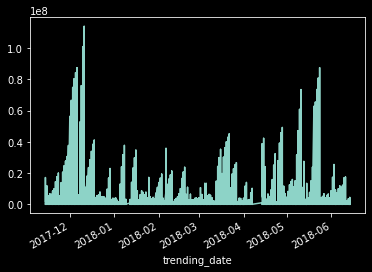

In [240]:
df['views'].plot();

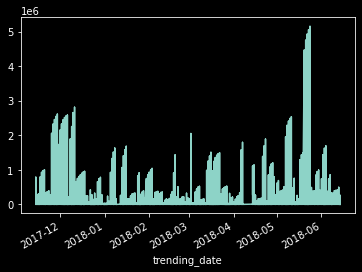

In [218]:
df['likes'].plot();

<AxesSubplot:xlabel='trending_date'>

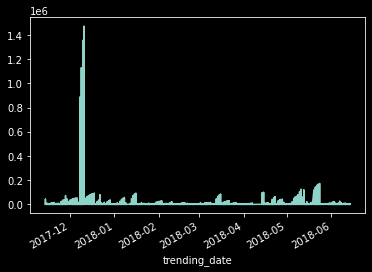

In [219]:
df['dislikes'].plot()

<AxesSubplot:xlabel='trending_date'>

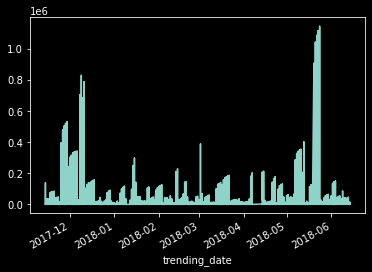

In [221]:
df['comment_count'].plot()

In [222]:
df['category_id'].unique()

array([22, 25, 17, 19, 23, 10, 24, 15,  1, 43, 28, 20, 29,  2, 27, 26, 44])

In [231]:
# Entertainment
df[df['category_id'] == 22].head()

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-11-14,RxGQe4EeEpA,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
2017-11-14,9V8bnWUmE9U,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
2017-11-14,4Nxb_nQDYWo,예능신 이광수 하이라이트 모음,채린이의 즐거운 유튜브,22,2017-11-12T03:30:47.000Z,"Positive|""Energy""|""Chakra""|""Balancing""|""Healin...",114858,252,40,36,https://i.ytimg.com/vi/4Nxb_nQDYWo/default.jpg,False,False,False,매일 2개 영상 업로드 됩니다 ^^\n즐겁게 보셨다면 구독과 좋아요를 눌러주세요 ^^
2017-11-14,cplEUy1zk80,[일본반응] 한국이 인도-태평양 안보라인에 참가를 거절 !!! 난리가 난 일본,보고 싶었던 해외반응 이슈,22,2017-11-12T11:40:23.000Z,"일본|""한국""|""안보라인""|""인도 태평양""|""인도""|""태평양""|""미국""|""중국""|""동맹""",70166,301,37,352,https://i.ytimg.com/vi/cplEUy1zk80/default.jpg,False,False,False,Kevin MacLeod의 At Launch은(는) Creative Commons ...
2017-11-14,iToRdbxuMtg,현재 논란중인 홍대 머리채남,궁금타파,22,2017-11-12T18:52:16.000Z,"홍대|""홍대 버스킹""",65547,91,207,154,https://i.ytimg.com/vi/iToRdbxuMtg/default.jpg,False,False,False,홍대 댄스 버스킹하는데 갑자기 여성분 머리 잡고 나옴...


In [230]:
# Politics
df[df['category_id'] == 25].head()

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-11-14,hH7wVE8OlQ0,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2017-11-14,0_8py-t5R80,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
2017-11-14,bk55RbxiQdI,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
2017-11-14,AmP0ryzDmbY,김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 깜놀,하우스,25,2017-11-12T10:17:48.000Z,"김정숙|""김정숙 여사""|""김정숙 문재인""|""문재인 대통령""|""문재인""|""문재인 인도...",188707,545,311,357,https://i.ytimg.com/vi/AmP0ryzDmbY/default.jpg,False,False,False,김정숙 여사는 왜 갑자기 문재인 대통령 주머니에 손을 넣었나? 인도네시아 대통령도 ...
2017-11-14,Ssx4JpUsW_U,"[ 전체 ] 김어준의 뉴스공장 1113(월) 박범계, 최강욱, 김준형, 정청래, 임상훈",시대정신,25,2017-11-13T00:02:11.000Z,"박범계|""최강욱""|""김준형""|""정청래""|""임상훈""|""김어준의 뉴스공장""",88115,765,63,104,https://i.ytimg.com/vi/Ssx4JpUsW_U/default.jpg,False,False,False,NaN


In [229]:
# Sports
df[df['category_id'] == 17].head()

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-11-14,9dQ02l7YlQI,"우리가 원했던 경기력 !!! 손흥민 멀티골, 기성용 탈압박 ● 대한민국 vs 콜롬비...",HEON honey,17,2017-11-10T13:22:26.000Z,[none],1812042,5142,511,5296,https://i.ytimg.com/vi/9dQ02l7YlQI/default.jpg,False,False,False,2017. 11. 10\n국가대표 친선경기\n대한민국 2 vs 1 콜롬비아
2017-11-14,9r5ncSsv59I,"손흥민, 차범근이 부르자 말없이 안겨서 울다!!! 차붐도 덩달어 코끝이 빨개집니다",Sports Highlights,17,2017-11-11T01:34:22.000Z,"차범근|""대한민국 콜롬비아""|""한국 콜롬비아""|""축구""|""평가전""|""국가대표""|""손...",290742,959,36,262,https://i.ytimg.com/vi/9r5ncSsv59I/default.jpg,False,False,False,설명
2017-11-14,FT0jBSkCqjQ,[겁 없는 녀석들] 한반도 최고 허세남의 최후는?,ROAD FIGHTING CHAMPIONSHIP,17,2017-11-11T16:39:52.000Z,[none],204935,197,87,243,https://i.ytimg.com/vi/FT0jBSkCqjQ/default.jpg,False,False,False,[겁 없는 녀석들] 한반도 최고 허세남의 최후는?
2017-11-14,fz7whSExAk4,용큐놀이 해보았다! 이용규보다 파울 많이치기 도전!!,썩코치의 야구쑈,17,2017-11-13T10:00:02.000Z,"썩코치|""썩코치의야구쑈""|""야구쑈""|""야구""|""야구코치""|""프로야구""|""동네야구""|...",30406,368,12,599,https://i.ytimg.com/vi/fz7whSExAk4/default.jpg,False,False,False,이용규 선수보다 파울 많이치는게 가능?!?\n끈질기게 투수와 승부하는 이용규 선수의...
2017-11-14,iDdElhzVx_c,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!,맨유튜브,17,2017-11-10T15:08:47.000Z,"맨유|""맨유튜브""|""맨체스터유나이티드""|""맨체스터 유나이티드""|""무리뉴""|""무리뉴 ...",467546,542,83,899,https://i.ytimg.com/vi/iDdElhzVx_c/default.jpg,False,False,False,171110 마르셀로 미친 중거리 골!!! ●일본 1:3 브라질 하이라이트!\n\n...


In [234]:
df.sort_values(by='views',ascending=False)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-11,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811223,1470388,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2017-12-10,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656686,1353663,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2017-12-06,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2018-05-24,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150839,172570,1142274,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
2017-12-05,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555414,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-11,xzrwNEV_8Gg,다니엘 생일 축하해!,여름감기 from OSW,22,2017-12-10T12:20:41.000Z,"kangdaniel|""daniel""|""다녤""|""fanmade""|""데뷔전""|""pre-...",3268,333,0,10,https://i.ytimg.com/vi/xzrwNEV_8Gg/default.jpg,False,False,False,※재업로드 하지마세요! Do not Re-upload※\n※재편집 하지마세요! Do...
2018-03-06,Pj-QWzy4PsQ,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,25,2018-03-05T20:31:15.000Z,"정법|""정법강의""|""진정스승님""|""즉문즉설""|""천부경""|""정법시대""|""정법클럽""|""...",3124,0,0,0,https://i.ytimg.com/vi/Pj-QWzy4PsQ/default.jpg,True,True,False,질문 : 먼저 공도 사상에 뿌리 된 공적인 삶과 또 제 신을 제 수준만큼 이해할 수...
2018-02-27,3cdfrhklH_8,애슐리 18년도 딸기축제 영상❣,ashley wow,24,2018-02-27T00:57:01.000Z,[none],2919,10,4,1,https://i.ytimg.com/vi/3cdfrhklH_8/default.jpg,False,False,False,딸기 신메뉴가 13종!\n산처럼 쌓인 신선한 생딸기!\n애슐리의 봄은 생딸기 인가 봄❣


### Word Cloud

In [241]:
from wordcloud import WordCloud

In [255]:
text_tags = " ".join(df['tags'])

In [256]:
text_tags[:100]

'라푸마|"윤종신"|"좋니"|"좋아"|"샬레"|"민서" JSA|"귀순"|"북한군"|"총격"|"부상"|"JSA 귀순 북한군 총격 부상" 아디다스|"빼빼로"|"핫쇼"|"나몰라패밀리"|"'

In [295]:
import os.path

In [300]:
os.path.abspath('AppleGothdic')

'/Users/swsong/Jupyter/Git_Machine_Learning/Machine-Learning-Easy/Youtube_trend_KR/AppleGothdic'

In [297]:
wordcloud = WordCloud(
    font_path='/Users/swsong/Jupyter/Git_Machine_Learning/Machine-Learning-Easy/Youtube_trend_KR/AppleGothic.ttf',
    width = 800,
    height = 800
)

In [257]:
keyword_tags = wordcloud.generate(text_tags)

In [258]:
keyword_tags.to_array()[:10]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [4, 0, 5],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [3, 0, 4],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [259]:
array_tags = keyword_tags.to_array()

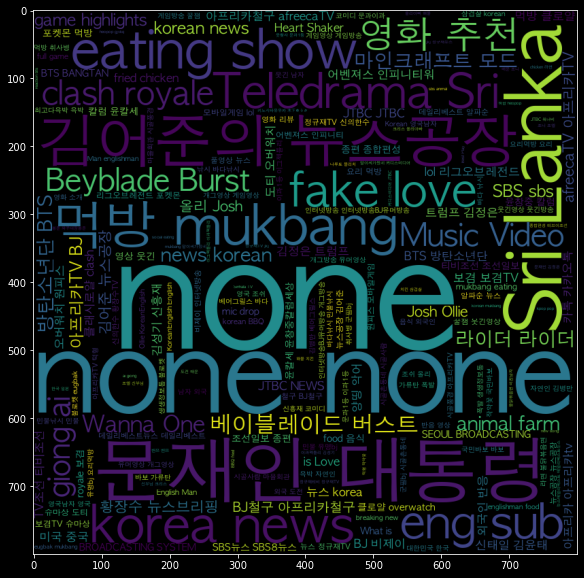

In [260]:
plt.figure(figsize=(10,10))
plt.imshow(
    array_tags,
    #interpolation='bilinear'
)
plt.show()

In [261]:
text_title = " ".join(df['title'])

In [262]:
keyword_title = wordcloud.generate(text_title)

In [263]:
array_title = keyword_title.to_array()

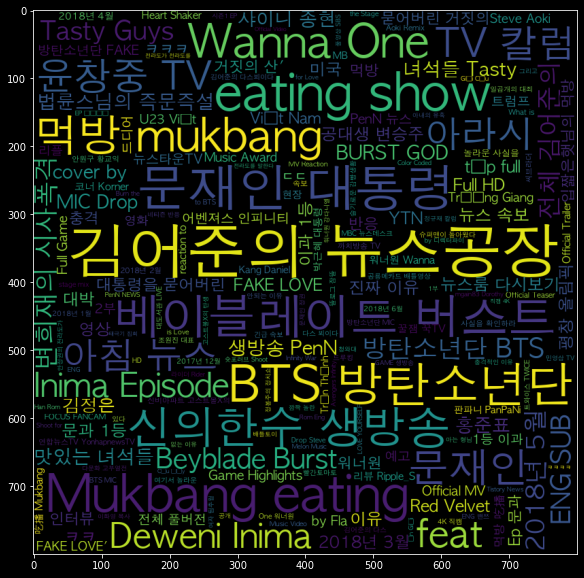

In [279]:
plt.figure(figsize=(10,10))
plt.imshow(array_title)
plt.show()

In [265]:
df.sort_values(by='views',ascending=False)

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2017-12-11,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",113876217,2811223,1470388,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2017-12-10,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",100911567,2656686,1353663,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p..."
2017-12-06,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",87450245,2584675,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
2018-05-24,7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",87430865,5150839,172570,1142274,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
2017-12-05,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,2017-11-29T13:26:24.000Z,"marvel|""comics""|""comic books""|""nerdy""|""geeky""|...",84281319,2555414,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,False,False,False,There was an idea… Avengers: Infinity War. In ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-11,xzrwNEV_8Gg,다니엘 생일 축하해!,여름감기 from OSW,22,2017-12-10T12:20:41.000Z,"kangdaniel|""daniel""|""다녤""|""fanmade""|""데뷔전""|""pre-...",3268,333,0,10,https://i.ytimg.com/vi/xzrwNEV_8Gg/default.jpg,False,False,False,※재업로드 하지마세요! Do not Re-upload※\n※재편집 하지마세요! Do...
2018-03-06,Pj-QWzy4PsQ,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,25,2018-03-05T20:31:15.000Z,"정법|""정법강의""|""진정스승님""|""즉문즉설""|""천부경""|""정법시대""|""정법클럽""|""...",3124,0,0,0,https://i.ytimg.com/vi/Pj-QWzy4PsQ/default.jpg,True,True,False,질문 : 먼저 공도 사상에 뿌리 된 공적인 삶과 또 제 신을 제 수준만큼 이해할 수...
2018-02-27,3cdfrhklH_8,애슐리 18년도 딸기축제 영상❣,ashley wow,24,2018-02-27T00:57:01.000Z,[none],2919,10,4,1,https://i.ytimg.com/vi/3cdfrhklH_8/default.jpg,False,False,False,딸기 신메뉴가 13종!\n산처럼 쌓인 신선한 생딸기!\n애슐리의 봄은 생딸기 인가 봄❣


In [272]:
df.sort_values(by='views',ascending=False)[500:505]

,video_id,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
trending_date,,,,,,,,,,,,,,,
2018-06-11,uID_f0W7vZQ,"Nhanh Như Chớp | Tập 10 Full: Trường Giang, Ha...",ĐÔNG TÂY PROMOTION OFFICIAL,24,2018-06-09T14:50:05.000Z,"dong tay promotion|""đông tây promotion""|""htv""|...",3298533,16754,2027,4220,https://i.ytimg.com/vi/uID_f0W7vZQ/default.jpg,False,False,False,HTV Nhanh Như Chớp | Tập 10 Full: Dù Có Hai Co...
2017-12-07,vcqImqOVE2U,[MV] HyunA(현아) _ Lip & Hip,1theK (원더케이),10,2017-12-04T09:00:03.000Z,"Kpop|""1theK""|""원더케이""|""loen""|""로엔""|""뮤비""|""티져""|""MV""...",3295581,150930,9511,14370,https://i.ytimg.com/vi/vcqImqOVE2U/default.jpg,False,False,False,[MV] HyunA(현아) _ Lip & Hip\n\n*English subtitl...
2018-01-15,XcdLVKYsHHU,EXO 'Electric Kiss' Dance Practice,SMTOWN,10,2018-01-13T03:00:01.000Z,"EXO|""엑소""|""일렉트릭키스""|""Electric Kiss""|""엑소 일본""|""KPO...",3287432,396301,2203,32894,https://i.ytimg.com/vi/XcdLVKYsHHU/default.jpg,False,False,False,EXO's 1st full album in Japan \n\nEXO's 1st fu...
2018-01-21,7miowwmyhdI,ㄹㅇ내 여자친구 개 쩌는듯..,Namsoon 남순,22,2018-01-15T10:13:37.000Z,"댄스|""cover""|""여캠""|""리액션""|""오빠야""|""이설""|""김이브님""|""윰댕""|""...",3282028,12691,4181,3124,https://i.ytimg.com/vi/7miowwmyhdI/default.jpg,False,False,False,#남순 #서윤 #남서윤 #야방데이트 #데이트\n\n아프리카TV 방송국♥ http:/...
2017-11-20,VD1QOLIhvzA,"Giọng ải giọng ai 2 | tập 7 full: Thu Thủy, Ưn...",DIEN QUAN Entertainment / Giải Trí,24,2017-11-18T13:15:13.000Z,"Giọng ải giọng ai|""giong ai giong ai""|""tran th...",3280361,12863,1527,4594,https://i.ytimg.com/vi/VD1QOLIhvzA/default.jpg,False,False,False,Giọng ải giọng ai tập 7 với sự xuất hiện của 2...


In [275]:
text_title_top500 = " ".join(list(df.sort_values(by='views',ascending=False)['title'])[:500])

In [276]:
keyword_title_top500 = wordcloud.generate(text_title_top500)

In [277]:
array_title_top500 = keyword_title_top500.to_array()

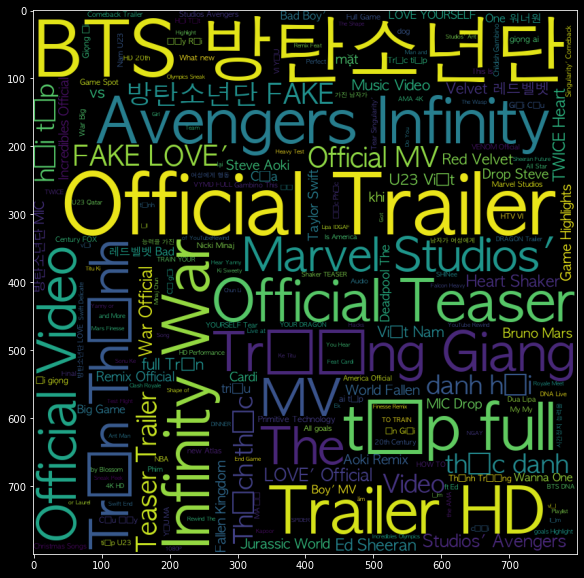

In [287]:
plt.figure(figsize=(10,10))
plt.imshow(array_title_top500)
plt.show()

In [280]:
text_tags_top500 = " ".join(list(df.sort_values(by='views',ascending=False)['tags'])[:500])

In [281]:
keyword_tags_top500 = wordcloud.generate(text_tags_top500)

In [282]:
array_tags_top500 = keyword_tags_top500.to_array()

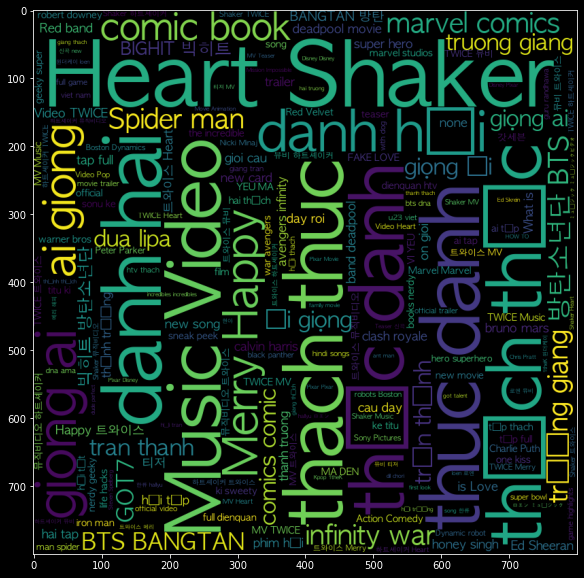

In [298]:
plt.figure(figsize=(10,10))
plt.imshow(array_tags_top500)
plt.show()